# Load necessary packages

In [15]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.multicomp as mc

# Read Data 

In [16]:
df = pd.read_csv("esoph.csv")
display(df)

,Unnamed: 0,agegp,alcgp,tobgp,ncases,ncontrols,cases_per_population
0,16,35-44,0-39g/day,0-9g/day,0,60,0.000000
1,17,35-44,0-39g/day,10-19,1,14,0.071429
2,18,35-44,0-39g/day,20-29,0,7,0.000000
3,19,35-44,0-39g/day,30+,0,8,0.000000
4,20,35-44,40-79,0-9g/day,0,35,0.000000
...,...,...,...,...,...,...,...
68,84,75+,40-79,30+,1,1,1.000000
69,85,75+,80-119,0-9g/day,1,1,1.000000
70,86,75+,80-119,10-19,1,1,1.000000
71,87,75+,120+,0-9g/day,2,2,1.000000


# Visualice Data

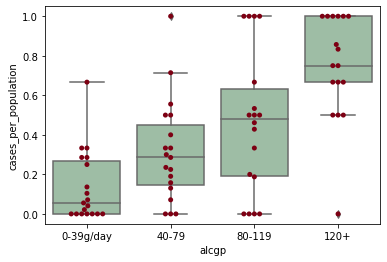

In [17]:
ax = sns.boxplot(x='alcgp', y='cases_per_population', data=df, color='#99c2a2')
ax = sns.swarmplot(x="alcgp", y="cases_per_population", data=df, color='#7d0013')
plt.show()

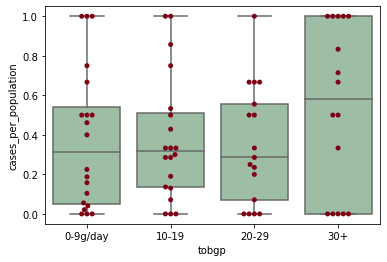

In [18]:
ax = sns.boxplot(x='tobgp', y='cases_per_population', data=df, color='#99c2a2')
ax = sns.swarmplot(x="tobgp", y="cases_per_population", data=df, color='#7d0013')
plt.show()

# Fit the Model

In [19]:
model = ols('cases_per_population ~ tobgp + alcgp + tobgp:alcgp', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
tobgp,0.521667,3.0,2.233204,9.414858e-02
alcgp,3.745410,3.0,16.033731,1.124331e-07
tobgp:alcgp,0.218660,9.0,0.312020,9.678944e-01
Residual,4.438318,57.0,NaN,NaN


**Interpration**: As we obtain **P-value < 0.05** we can conclude that it existis significative difference among groups. Note that the **F-value** is inverse proportional to the **P-value**

**Warning**: We can only conclude that at least **only one group** is significative difference from the rest, but wa cannot afirm that exists significative difference between the groups

# Check ANOVA assumptions

## Normality of the Residues

In [20]:
res = model.resid

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


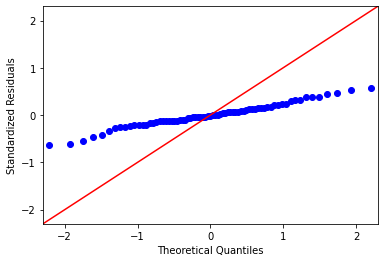

In [21]:
sm.qqplot(res, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

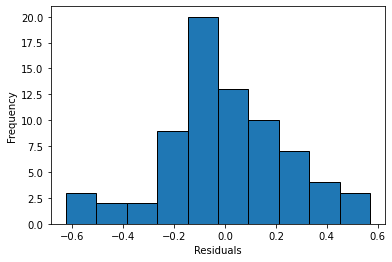

In [22]:
plt.hist(res, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [23]:
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9823050498962402, pvalue=0.3972177505493164)

## Homoscedasticity between Groups

In [24]:
stats.levene(df['cases_per_population'][df['alcgp'] == '0-39g/day'],
             df['cases_per_population'][df['alcgp'] == '40-79'],
             df['cases_per_population'][df['alcgp'] == '80-119'],
             df['cases_per_population'][df['alcgp'] == '120+'])

LeveneResult(statistic=2.3875592004881656, pvalue=0.0763792011177262)

In [25]:
stats.levene(df['cases_per_population'][df['tobgp'] == '0-9g/day'],
             df['cases_per_population'][df['tobgp'] == '10-19'],
             df['cases_per_population'][df['tobgp'] == '20-29'],
             df['cases_per_population'][df['tobgp'] == '30+'])

LeveneResult(statistic=1.7243190731626041, pvalue=0.17005269105625923)

# Post Hoc Analysis

In [27]:
comp = mc.MultiComparison(df['cases_per_population'],df['alcgp'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1  group2 meandiff p-adj   lower   upper  reject
-------------------------------------------------------
0-39g/day   120+   0.6105  0.001  0.3697  0.8513   True
0-39g/day  40-79   0.1762 0.2047 -0.0578  0.4102  False
0-39g/day 80-119   0.3257 0.0031  0.0884  0.5629   True
     120+  40-79  -0.4342  0.001  -0.675 -0.1934   True
     120+ 80-119  -0.2848 0.0157 -0.5287 -0.0408   True
    40-79 80-119   0.1495 0.3538 -0.0878  0.3867  False
-------------------------------------------------------


In [28]:
comp = mc.MultiComparison(df['cases_per_population'],df['tobgp'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
0-9g/day  10-19  -0.0051    0.9 -0.2956 0.2855  False
0-9g/day  20-29  -0.0296    0.9 -0.3327 0.2734  False
0-9g/day    30+   0.1557  0.542 -0.1525 0.4638  False
   10-19  20-29  -0.0246    0.9 -0.3276 0.2785  False
   10-19    30+   0.1608 0.5179 -0.1474 0.4689  False
   20-29    30+   0.1853   0.43 -0.1347 0.5053  False
-----------------------------------------------------


# Exercise 1: Repeat the ANOVA test for the tobaco consum (tobgp)

In [ ]:
#ax = sns.boxplot()
#ax = sns.swarmplot()
#plt.show()

In [ ]:
#model = ols().fit()
#anova_table = sm.stats.anova_lm()
#anova_table

In [ ]:
#res = Acces to the residuals

In [ ]:
#### Plot the Q-Q Plot

In [ ]:
#### Plot the Histogram

In [ ]:
#stats.shapiro()

In [ ]:
#stats.levene()

# Exercise 2: Repeat the Analysis for the Population Age (agegp)